
     -----------------------------------------------------------------------------------------
     -----------------------------------------------------------------------------------------
                                1 Dimensional SPH Code
     -----------------------------------------------------------------------------------------
     Starting date: November 2023
     Last edit date: 2024-05-14
     Author: Pratishtha Rawat (University of Warwick)
     -----------------------------------------------------------------------------------------
     -----------------------------------------------------------------------------------------


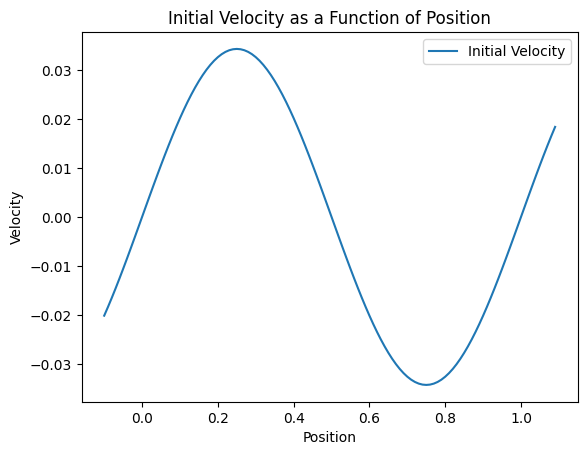

1.0018004115226273
1.0018004115226273
117860.81661522559
117860.81661522559
1.0018004115226273
1.0018004115226322
117860.81661522559
117860.81661522615
1.0018004115226273
1.0018004115226327
117860.81661522559
117860.81661522621
1.0018004115226273
1.0018004115226327
117860.81661522559
117860.81661522621
1.0018004115226273
1.0018004115226327
117860.81661522559
117860.81661522621
1.0018004115226273
1.0018004115226327
117860.81661522559
117860.81661522621
1.0018004115226273
1.0018004115226327
117860.81661522559
117860.81661522621
1.0018004115226273
1.0018004115226335
117860.81661522559
117860.81661522631
1.0018004115226273
1.001800411522643
117860.81661522559
117860.81661522744
1.0018004115226273
1.0018004115226382
117860.81661522559
117860.81661522687
1.0018004115226273
1.0018004115226347
117860.81661522559
117860.81661522645
1.0018004115226273
1.001800411522634
117860.81661522559
117860.81661522637
1.0018004115226273
1.0018004115226338
117860.81661522559
117860.81661522634
1.001800411522

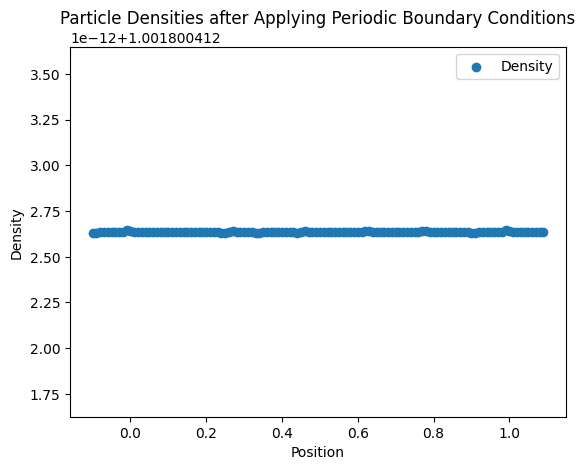

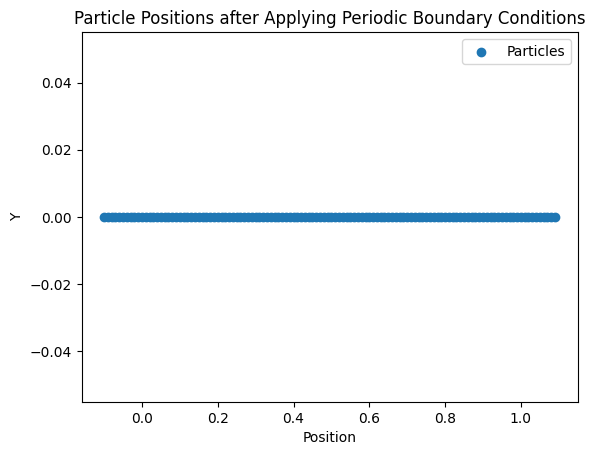

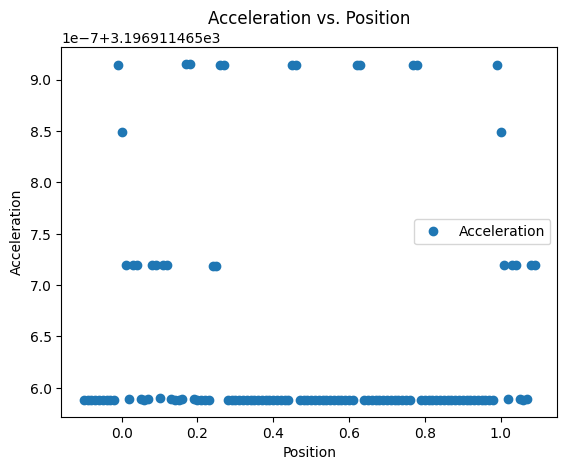

Length of df 120
[3196.9114655882104, 3196.9114655882104, 3196.9114655882026, 3196.911465588199, 3196.9114655881986, 3196.9114655881986, 3196.9114655881986, 3196.911465588197, 3196.9114655881885, 3196.911465914131, 3196.9114658489434, 3196.9114657195896, 3196.9114655892117, 3196.911465719595, 3196.9114657195955, 3196.911465589213, 3196.911465588195, 3196.911465589214, 3196.911465719595, 3196.911465719595, 3196.9114655902326, 3196.9114657195955, 3196.9114657195964, 3196.911465589215, 3196.911465588195, 3196.9114655881945, 3196.911465589214, 3196.9114659151683, 3196.911465915168, 3196.911465589214, 3196.911465588195, 3196.911465588195, 3196.9114655881963, 3196.9114655881995, 3196.9114657185887, 3196.911465718586, 3196.911465914144, 3196.911465914138, 3196.911465588186, 3196.9114655881904, 3196.911465588196, 3196.911465588198, 3196.9114655882, 3196.9114655882036, 3196.9114655882036, 3196.9114655882004, 3196.9114655881986, 3196.9114655881986, 3196.911465588196, 3196.9114655881913, 3196.911

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from particle_system_pandas import SPHParticles
from density_pandas import get_density, get_accel
from equation_of_state_pandas import equation_of_state
from output_pandas import output_particles
import boundary_conditions_pandas as bc
import output_pandas as output

def main():
    start_time = time.time()

    
    n_particles = 100
    num_neighbors = 10
    xmin_value = 0.0
    xmax_value = 1.0
    rho_0_value = 1.0
    #since mass of particles is dictated by rho_0 and number of particles, it is not here as an input value but it is same for all particles
    output_filename = "particle_properties.txt"

    total_particles = n_particles + 2 * num_neighbors
    particles = SPHParticles(total_particles)

    particles.setup(xmin_value, xmax_value, rho_0_value, num_neighbors)

    mass = particles.mass
    
    output_particles(particles.to_dataframe(), output_filename)

    data = pd.read_csv(output_filename)
    position = data['Position']
    velocity = data['Velocity']

    output.print_header()
    
    plt.plot(position, velocity, label='Initial Velocity')
    plt.title('Initial Velocity as a Function of Position')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.legend()
    plt.show()

    density = get_density(data['Position'], mass, data['Smoothing_Length'], num_neighbors)
    particles.data['Density'] = density

    particles.data['Pressure'] = equation_of_state(particles.data['Density'], sound_speed=343.0)
    particles.data['Internal_Energy'] = np.zeros_like(particles.data['Position'])

    particles.data = bc.periodic_bc(particles.data, num_neighbors)
    
    particles.data['Acceleration'] = get_accel(particles.data['Position'], particles.data['Pressure'], particles.data['Density'], mass, particles.data['Smoothing_Length'], num_neighbors)
    
    particles.data = bc.periodic_bc(particles.data, num_neighbors)

    output_particles(particles.to_dataframe(), output_filename)

    print("Positions:                                    ", particles.data['Position'].tolist())
    print("Density:                                    ", particles.data['Density'].tolist())
    #print("Density:                                    ", particles.data['Density'])
    print("Pressure:                                    ", particles.data['Pressure'].tolist())

    #density_sum = np.sum(particles.data['Density'])
    #print("Density summation:", density_sum)
    
    plt.scatter(particles.data['Position'], particles.data['Density'], label='Density')
    plt.title('Particle Densities after Applying Periodic Boundary Conditions')
    plt.xlabel('Position')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    plt.scatter(particles.data['Position'], [0] * len(particles.data['Position']), label='Particles')
    plt.title('Particle Positions after Applying Periodic Boundary Conditions')
    plt.xlabel('Position')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

    plt.plot(particles.data['Position'], particles.data['Acceleration'], 'o', label='Acceleration')
    plt.xlabel('Position')
    plt.ylabel('Acceleration')
    plt.title('Acceleration vs. Position')
    plt.legend()
    plt.show()
    print("Length of df", len(particles.data['Position']))
    print(particles.data['Acceleration'].tolist())

    end_time = time.time()
    
    output.print_execution_time(start_time, end_time)  
    
if __name__ == "__main__":
    main()

NameError: name 'acceleration' is not defined

## Execution time with mass as a column (n = 100, ghosts = 10): 0.45 seconds
## Execution time with mass as a single variable: 0.36 seconds